<a href="https://colab.research.google.com/github/dhar9571/Python---Diwali-Sales-Data-Analysis/blob/main/Diwali_Sales_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Summary: This Python data analysis project is made on Diwali Sales dataset for a company to find out valuable insights and target customers to increase sales and revenue.

In [2]:
# Importing required libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Mounting Google Drive:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the dataset:

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Diwali_Sales_Dataset/Diwali Sales Data.csv",encoding='unicode_escape')

# To avoid error, used "unicode_escape" encoding

In [5]:
# Dataframe first view:

df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
# Dataframe shape

df.shape

(11251, 15)

In [7]:
# Checking null values in dataframe:

df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [8]:
# Dropping null columns:

df.drop(columns = ["Status","unnamed1"],axis = 1, inplace = True)

In [9]:
# Deleting null rows from the dataframe:

df.dropna(inplace=True)

In [10]:
# Again checking null values in dataframe:

df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
# Converting the data type of Amount columns as it has anomlies in decimal numbers:

df["Amount"] = df["Amount"].astype(int)

In [12]:
# Dataframe information:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [13]:
# Viewing of the data description for age, orders and amount columns:

df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

### Gender

Text(0.5, 1.0, 'Gender Count')

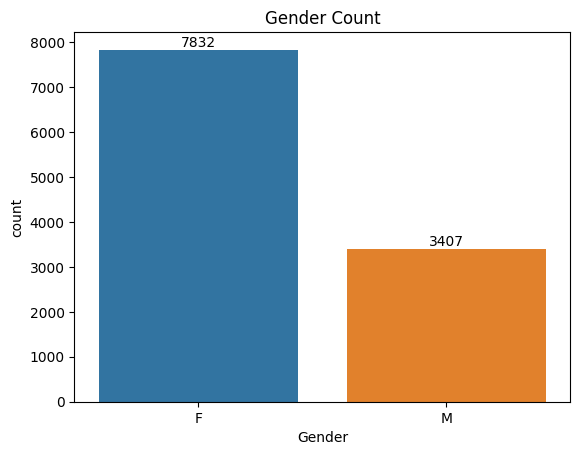

In [14]:
# Countplot for Gender counts:

ax = sns.countplot(x=df["Gender"])

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Gender Count")

Observation: Female has more than double the count of Males.

Text(0.5, 1.0, 'Gender wise Total Amount')

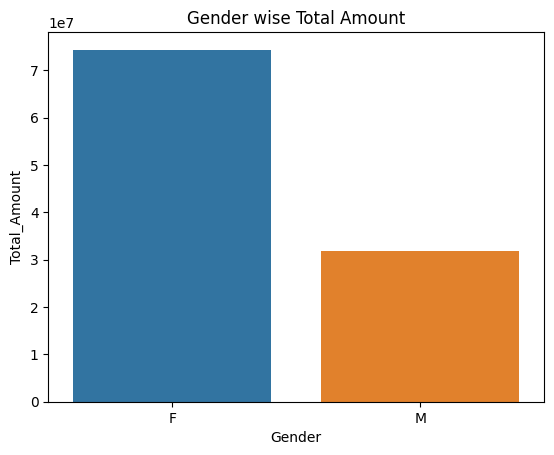

In [15]:
# Plotting gender wise total amount in bar chart:

# Creating a seperate dataframe which shows gender wise sum of amount:
gender_amount = df.groupby("Gender")["Amount"].sum().reset_index().rename(columns = {"Amount":"Total_Amount"})

sns.barplot(x=gender_amount["Gender"],y=gender_amount["Total_Amount"])

plt.title("Gender wise Total Amount")

Observation: Females has almost more than double the purchasing power than Males.

### Age

Text(0.5, 1.0, 'Gender wise Age Group counts')

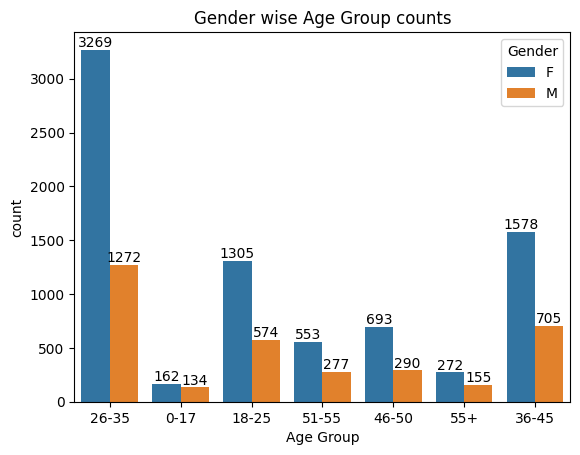

In [16]:
# Plotting age group counts:

ax = sns.countplot(x=df["Age Group"],hue=df["Gender"])

for bars in ax.containers:
  ax.bar_label(bars)

plt.title("Gender wise Age Group counts")

Observation: From above graph, we can clearly see that age group 26-35 has the most counts in which Females has more than double the count of Males.

Text(0.5, 1.0, 'Age Group wise Total Amount')

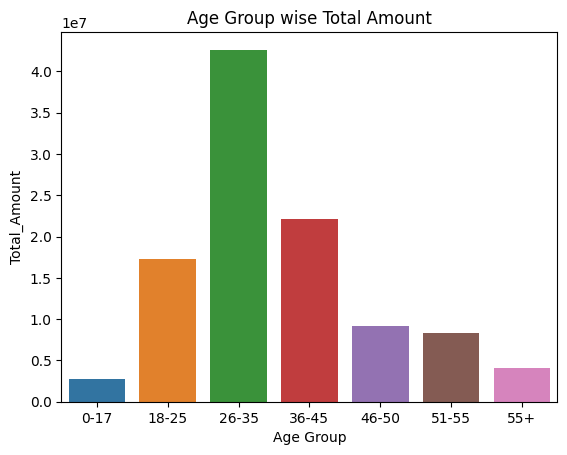

In [17]:
# Plotting Age group wise Total Amount:

# Creating new dataframe which contains group wise sum amount:

age_amount = df.groupby("Age Group")["Amount"].sum().reset_index().rename(columns={"Amount":"Total_Amount"})

ax = sns.barplot(x=age_amount["Age Group"],y=age_amount["Total_Amount"])

plt.title("Age Group wise Total Amount")

Observation: As per above chart, age group 26-35 has the most buyers.

### State

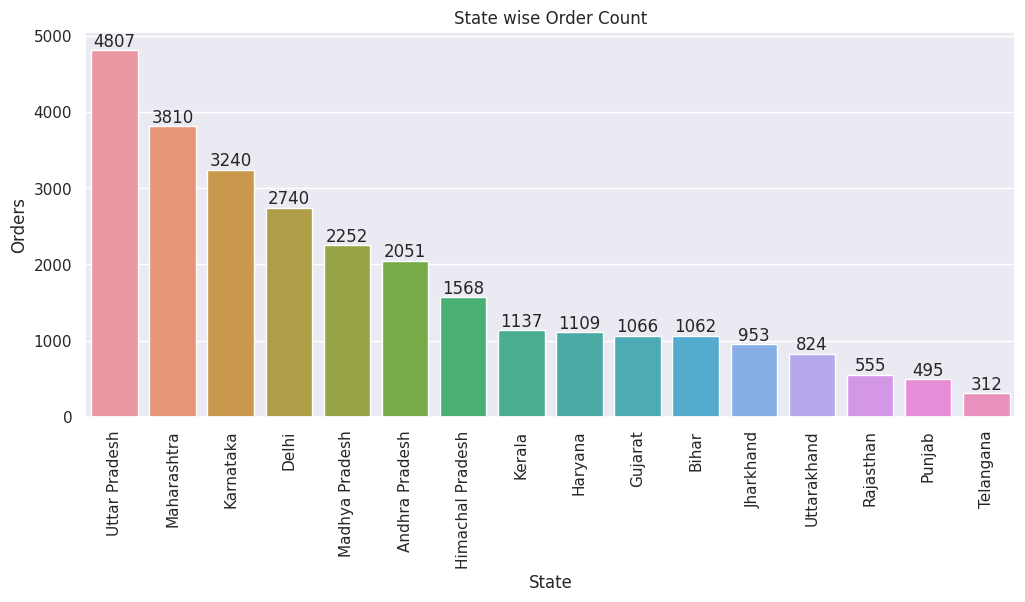

In [18]:
# Plotting state wise order counts:

state_orders = df.groupby("State")["Orders"].sum().sort_values(ascending=False).reset_index()

# resetting plot size:
sns.set(rc={'figure.figsize':(12,5)})

ax = sns.barplot(x = state_orders["State"], y = state_orders["Orders"])

for bars in ax.containers:
  ax.bar_label(bars) 

plt.title("State wise Order Count")
plt.xticks(rotation=90)
plt.show()

Observation: From above sorted chart, we can see that Uttar Pradesh state has the most number of orders. Maharashtra and Karnataka are at 2nd and 3rd place.

### Marital Status

Text(0.5, 1.0, 'Marital Status wise Count')

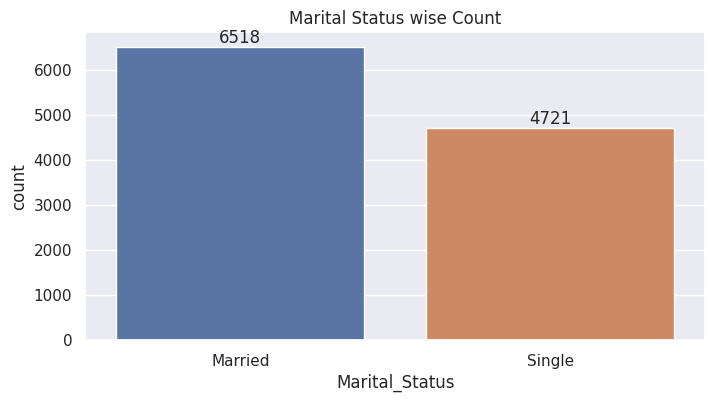

In [43]:
# Marital_Status wise count:

#resetting chart size:
sns.set(rc={'figure.figsize':(8,4)})

ax = sns.countplot(x=df["Marital_Status"])

ax.set_xticklabels(["Married","Single"])

for bars in ax.containers:
  ax.bar_label(bars)

plt.title("Marital Status wise Count")

Observation: Single (Unmarried) buyers have more count that Married.

[Text(0, 0, 'Married'), Text(1, 0, 'Single')]

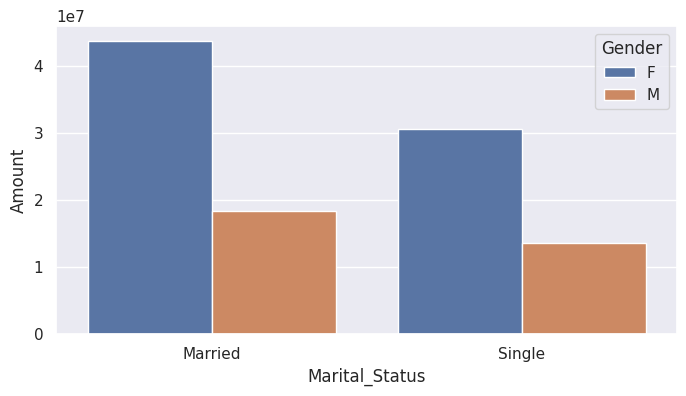

In [44]:
# Creating a new dataset which will contain martial status wise total amount:

marital_amount = df.groupby(["Marital_Status","Gender"])["Amount"].sum().reset_index()

ax = sns.barplot(x=marital_amount["Marital_Status"],y=marital_amount["Amount"],hue=marital_amount["Gender"])

ax.set_xticklabels(["Married","Single"])

Observation: As per above plot, we can see that above buyers are Females which are Married.

### Occupation

Text(0.5, 1.0, 'Occupation wise Count')

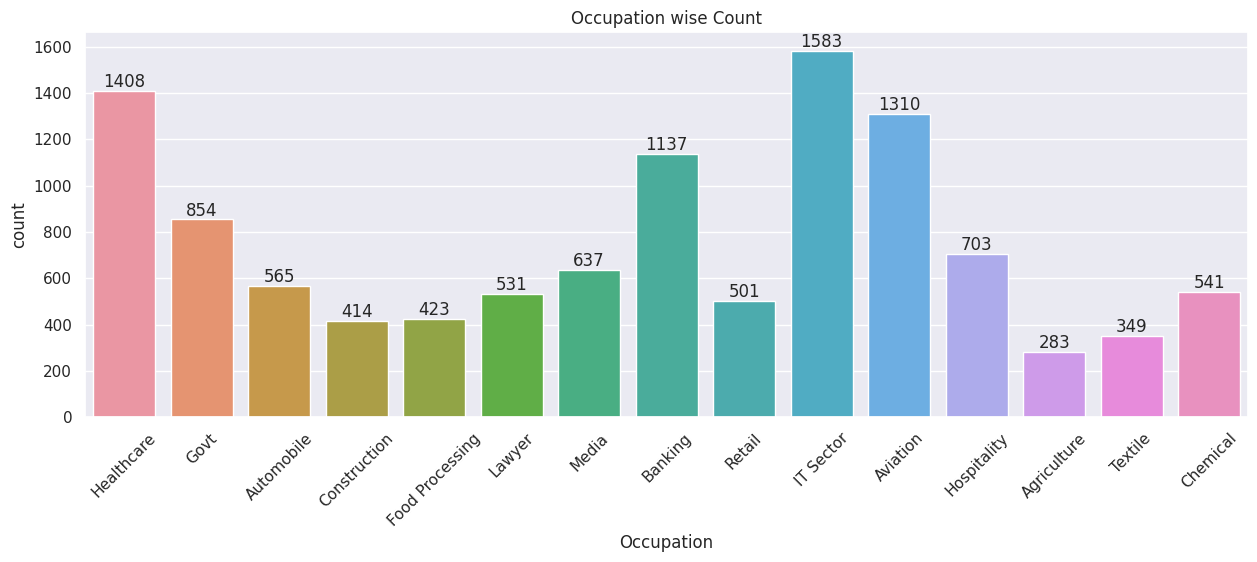

In [49]:
# Occupation wise count:

# resetting plot size:
sns.set(rc={'figure.figsize':(15,5)})

ax = sns.countplot(x=df["Occupation"])

for bars in ax.containers:
  ax.bar_label(bars)

plt.xticks(rotation=45)

plt.title("Occupation wise Count")

Observation: We can clearly see that IT Sector and Healthcare type have the most counts.

Text(0.5, 1.0, 'Occupation wise Total_Amount')

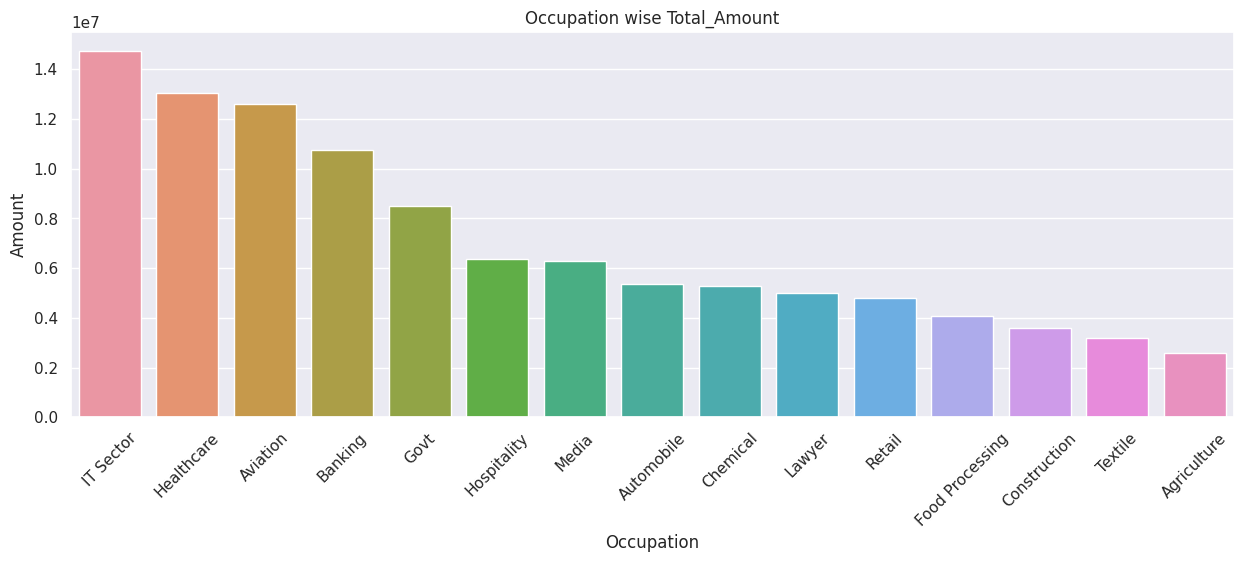

In [63]:
# Creating new dataset to contain occupation wise total amount in sorted order:

occupation_amount = df.groupby("Occupation")["Amount"].sum().reset_index().sort_values(by="Amount",ascending=False)

# Plotting barchart:

sns.barplot(x=occupation_amount["Occupation"],y=occupation_amount["Amount"])
                 
plt.xticks(rotation=45)
plt.title("Occupation wise Total_Amount")

Observation: Most of the buyers' occupation belongs to IT Sector.

### Product Category

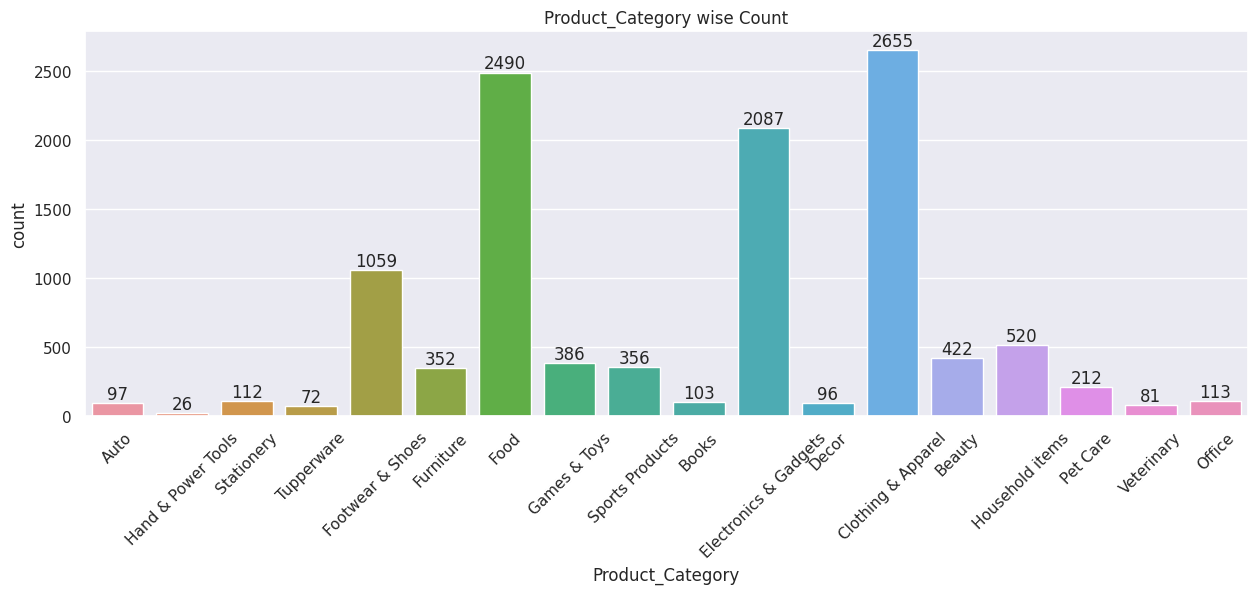

In [67]:
# Creating countplot for all product categories:

ax = sns.countplot(x=df["Product_Category"])

for bars in ax.containers:
  ax.bar_label(bars)

plt.title("Product_Category wise Count")

plt.xticks(rotation = 45)
plt.show()

Observation: Most of the orders are for Cloting & Apparel and Food product categories.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Food'),
  Text(1, 0, 'Clothing & Apparel'),
  Text(2, 0, 'Electronics & Gadgets'),
  Text(3, 0, 'Footwear & Shoes'),
  Text(4, 0, 'Furniture'),
  Text(5, 0, 'Games & Toys'),
  Text(6, 0, 'Sports Products'),
  Text(7, 0, 'Beauty'),
  Text(8, 0, 'Auto'),
  Text(9, 0, 'Stationery'),
  Text(10, 0, 'Household items'),
  Text(11, 0, 'Tupperware'),
  Text(12, 0, 'Books'),
  Text(13, 0, 'Decor'),
  Text(14, 0, 'Pet Care'),
  Text(15, 0, 'Hand & Power Tools'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

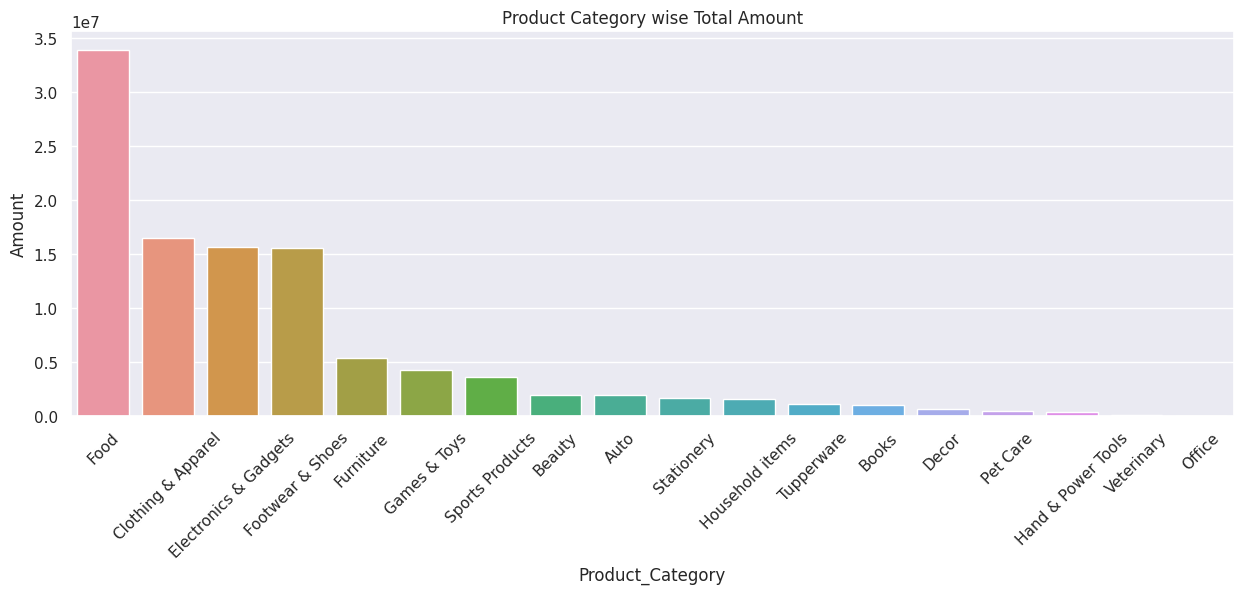

In [69]:
# Creating a new dataset to get total amount group by product categories:

product_amount = df.groupby("Product_Category")["Amount"].sum().reset_index().sort_values(by="Amount",ascending=False)

# Creating plot

sns.barplot(x=product_amount["Product_Category"],y=product_amount["Amount"])
plt.title("Product Category wise Total Amount")
plt.xticks(rotation=45)

Observation: From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category.

### Product ID

Text(0.5, 1.0, 'Product ID wise Order Count')

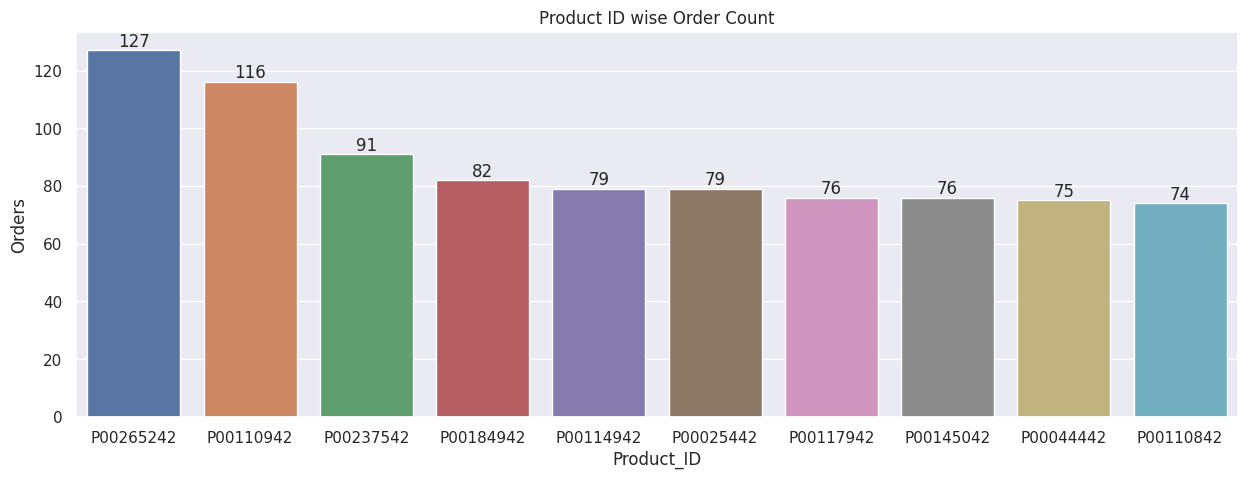

In [72]:
# Plotting product_ID wise order count:

# Creating a new dataframe to get sum of orders as per top product_ids:

productid_orders = df.groupby("Product_ID")["Orders"].sum().reset_index().sort_values(by="Orders",ascending=False).head(10)

ax = sns.barplot(x=productid_orders["Product_ID"],y=productid_orders["Orders"])

for bars in ax.containers:
  ax.bar_label(bars)

plt.title("Product ID wise Order Count")

Observation: Product ID P00265242 and P00110942 have the most number of orders.

## Conclusion:

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category